___
# Ciência dos Dados - PROJETO 1

## Gabriel Miras e Mariana Abrantes
___

## TÍTULO DO SEU PROJETO

___
## Introdução

Descreva aqui o que pretende analisar!

Capriche no português!! 
Se quiser pode utilizar pesquisas semelhantes publicadas em sites confiáveis!!


___
## Filtros da base de dados

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [4]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Mariana Abrantes\Documents\ciencia_dados\DP- P1


In [5]:
#Se usar o arquivo descompactado
dados = pd.read_csv('PES2015.csv',sep=',')
dados
#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,0,2015,11,15,1,1,2,27,2,1992,...,1.0,8.000000e+02,4.0,5,1.0,2.0,2.0,1.0,8.000000e+02,20161117
1,1,2015,11,15,3,1,4,4,5,1992,...,1.0,1.150000e+03,4.0,5,1.0,2.0,2.0,1.0,1.150000e+03,20161117
2,2,2015,11,15,4,1,4,4,1,1980,...,6.0,7.930000e+02,4.0,6,1.0,2.0,2.0,1.0,7.930000e+02,20161117
3,3,2015,11,15,4,2,2,5,6,1981,...,6.0,7.930000e+02,4.0,7,1.0,2.0,2.0,1.0,7.930000e+02,20161117
4,4,2015,11,15,4,3,4,8,4,2004,...,6.0,7.930000e+02,4.0,2,2.0,NaN,NaN,2.0,7.930000e+02,20161117
5,5,2015,11,15,4,4,4,1,12,2007,...,6.0,7.930000e+02,4.0,2,2.0,NaN,NaN,2.0,7.930000e+02,20161117
6,6,2015,11,15,4,5,4,6,12,2010,...,6.0,7.930000e+02,4.0,1,NaN,NaN,NaN,NaN,7.930000e+02,20161117
7,7,2015,11,15,4,6,4,8,9,1997,...,6.0,7.930000e+02,4.0,5,1.0,2.0,2.0,1.0,7.930000e+02,20161117
8,8,2015,11,15,5,1,2,3,1,1969,...,2.0,2.900000e+03,6.0,2,1.0,2.0,2.0,1.0,2.900000e+03,20161117
9,9,2015,11,15,5,2,4,1,1,1934,...,2.0,2.900000e+03,6.0,2,2.0,NaN,NaN,2.0,2.900000e+03,20161117


In [6]:
_dados = dados[['UF', 'V0302','V8005', 'V0402', 'V0601', 'V9042', 'V9531', 'V9054',
                'V9060','V9077', 'V4743', 'V4745']]

A = _dados.rename(index = str, columns = {'UF': "ESTADO"})
B = A.rename(index = str, columns = {'V0302': "SEXO"})
C = B.rename(index = str, columns = {'V8005': "IDADE"})
D = C.rename(index = str, columns = {'V0402': "CONDICAO"})
E = D.rename(index = str, columns = {'V0601': "ALFABETIZACAO"})
F = E.rename(index = str, columns = {'V9042': "CARTEIRA"})
G = F.rename(index = str, columns = {'V9531': "PAGAMENTO"})
H = G.rename(index = str, columns = {'V9054': "ESTABELECIMENTO"})
I = H.rename(index = str, columns = {'V9060': "T_PREVIDENCIA"})
J = I.rename(index = str, columns = {'V9077': "TRABALHO"})
M = J.rename(index = str, columns = {'V4743': "RENDIMENTO"})
N = M.rename(index = str, columns = {'V4745': "ESTUDO"})

N.head()

,ESTADO,SEXO,IDADE,CONDICAO,ALFABETIZACAO,CARTEIRA,PAGAMENTO,ESTABELECIMENTO,T_PREVIDENCIA,TRABALHO,RENDIMENTO,ESTUDO
0,11,2,23,1,1,4.0,1.0,1.0,NaN,NaN,4.0,5
1,11,4,23,1,1,2.0,1.0,1.0,2.0,NaN,4.0,5
2,11,4,35,1,1,4.0,1.0,1.0,2.0,NaN,4.0,6
3,11,2,34,2,1,NaN,1.0,3.0,NaN,NaN,4.0,7
4,11,4,11,3,1,NaN,NaN,NaN,NaN,NaN,4.0,2


In [7]:
P = N[N['IDADE']>= 70]

P.SEXO = P.SEXO.astype('category')
P.SEXO.cat.categories = (['Masculino', 'Feminino'])

P.CONDICAO = P.CONDICAO.astype('category')
P.CONDICAO.cat.categories = (['Pessoa de referencia', 'Conjuge', 'Filho', 'Outro', 'Agregado', 'Pensionista', 'Empregado domestico', 'Parente do empregado domestico'])

P.ALFABETIZACAO = P.ALFABETIZACAO.astype('category')
P.ALFABETIZACAO.cat.categories = (['Sim', 'Nao'])

P.CARTEIRA = P.CARTEIRA.astype('category')
P.CARTEIRA.cat.categories = (['Sim', 'Nao'])

P.PAGAMENTO = P.PAGAMENTO.astype('category')
P.PAGAMENTO.cat.categories = (['Existia rendimento em dinheiro'])

P.ESTABELECIMENTO = P.ESTABELECIMENTO.astype('category')
P.ESTABELECIMENTO.cat.categories = (['Lojas, oficina, etc', 'fazenda, sitio etc', 'domicilio que trabalha',
                                     'domicilio de patrao etc', 'local designado pelo cliente etc', 'em veiculo motor', 'em via publica', 'outros' ])

P.T_PREVIDENCIA = P.T_PREVIDENCIA.astype('category')
P.T_PREVIDENCIA.cat.categories = (['Federal', 'Municipal', 'Estadual'])

P.TRABALHO = P.TRABALHO.astype('category')
P.TRABALHO.cat.categories = (['Empregado', 'Trabalhador domestico', 'Conta Propria', 'Empregador', 'Trabalhador nao remunerado na unidade domiciliar',
                             'outro trabalho nao remunerado', 'trabalhador no proprio negocio'])

P.RENDIMENTO = P.RENDIMENTO.astype('category')
P.RENDIMENTO.cat.categories = (['Sem rendimento', 'Ate 1/4 de salario', 'mais de 1/4 ate 1/2 de salario', 'mais de 1/2 ate 1 de salario',
                               'mais de 1 ate 2 de salario', 'mais de 2 ate 3 de salario', 'mais de 3 ate 5 de salario', 'mais de 5 de salario',
                                'sem declaracao'])

P.ESTUDO = P.ESTUDO.astype('category')
P.ESTUDO.cat.categories = (['Sem instrucao', 'Fund. Incomp ou equivalente', 'Fund. compl ou equivalente', 'Med Incomp ou equivalente',
                            'Med compl ou equilavente', 'Sup Incompl ou equivalente', 'Superior completo', 'nao determinado'])

P.loc[(P.ESTADO>10)&(P.ESTADO<20), 'REGIAO'] = "Norte"
P.loc[(P.ESTADO>20)&(P.ESTADO<30), 'REGIAO'] = "Nordeste"
P.loc[(P.ESTADO>30)&(P.ESTADO<40), 'REGIAO'] = "Sudeste"
P.loc[(P.ESTADO>40)&(P.ESTADO<=50), 'REGIAO'] = "Sul"
P.loc[(P.ESTADO>=50)&(P.ESTADO<60), 'REGIAO'] = "Centro-Oeste"

P.head()

C:\Users\Mariana Abrantes\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\Mariana Abrantes\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Mariana Abrantes\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,ESTADO,SEXO,IDADE,CONDICAO,ALFABETIZACAO,CARTEIRA,PAGAMENTO,ESTABELECIMENTO,T_PREVIDENCIA,TRABALHO,RENDIMENTO,ESTUDO,REGIAO
9,11,Feminino,81,Outro,Sim,NaN,NaN,NaN,NaN,NaN,mais de 3 ate 5 de salario,Fund. Incomp ou equivalente,Norte
10,11,Feminino,71,Pessoa de referencia,Sim,NaN,NaN,NaN,NaN,NaN,mais de 2 ate 3 de salario,Fund. Incomp ou equivalente,Norte
118,11,Masculino,71,Pessoa de referencia,Nao,NaN,NaN,NaN,NaN,NaN,mais de 1/2 ate 1 de salario,Sem instrucao,Norte
131,11,Masculino,73,Pessoa de referencia,Sim,NaN,NaN,NaN,NaN,NaN,mais de 1 ate 2 de salario,Fund. Incomp ou equivalente,Norte
132,11,Feminino,71,Conjuge,Sim,NaN,NaN,NaN,NaN,NaN,mais de 1 ate 2 de salario,Fund. Incomp ou equivalente,Norte


___
## Análise e Resultados

In [8]:
P.RENDIMENTO.value_counts()

mais de 1/2 ate 1 de salario      8353
mais de 1 ate 2 de salario        6485
mais de 1/4 ate 1/2 de salario    1814
mais de 2 ate 3 de salario        1762
mais de 3 ate 5 de salario        1295
mais de 5 de salario              1102
sem declaracao                     522
Ate 1/4 de salario                 178
Sem rendimento                      21
Name: RENDIMENTO, dtype: int64

In [9]:
CT = pd.crosstab(P.REGIAO, P.RENDIMENTO, normalize = 'index')*100
CT

RENDIMENTO,nan,Ate 1/4 de salario,mais de 1/4 ate 1/2 de salario,mais de 1/2 ate 1 de salario,mais de 1 ate 2 de salario,mais de 2 ate 3 de salario,mais de 3 ate 5 de salario,mais de 5 de salario,sem declaracao
REGIAO,,,,,,,,,
Centro-Oeste,0.159405,0.265675,5.951116,36.291180,31.774708,8.554729,7.013815,7.757705,2.231668
Nordeste,0.080347,1.398040,12.453800,49.718785,23.589908,4.242327,3.663828,3.197815,1.655150
Norte,0.000000,1.660440,13.823163,46.284765,25.487754,5.479452,3.735990,1.826484,1.701951
Sudeste,0.150458,0.533443,6.127753,31.664615,33.401723,10.764601,7.427165,6.579127,3.351115
Sul,0.053952,0.188832,3.938495,30.914486,36.768276,11.275964,8.146749,6.258430,2.454815


Text(0,0.5,'Freq.Relativa (em %)')

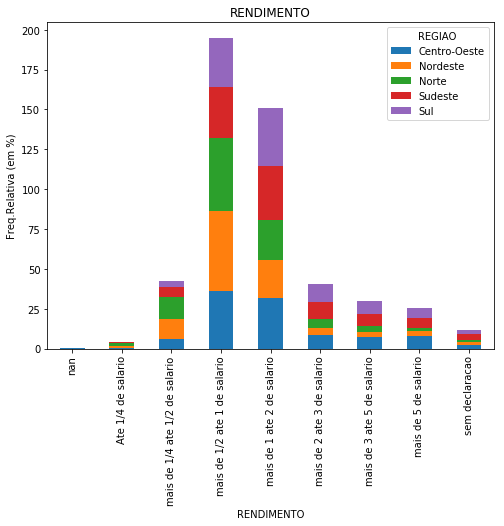

In [14]:
plot = CT.T.plot(kind='bar',stacked=True, title='RENDIMENTO',figsize=(8,6))
plt.ylabel('Freq.Relativa (em %)')

___
## Conclusão 

Descreva aqui suas conclusões!